In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
df_confirm = pd.read_csv("time_series_covid19_confirmed_global.csv")
df_death = pd.read_csv("time_series_covid19_deaths_global.csv")
df_recover = pd.read_csv("time_series_covid19_recovered_global.csv")

In [37]:
df_confirm = df_confirm.reset_index(drop=True)
df_death = df_death.reset_index(drop=True)
df_recover = df_recover.reset_index(drop=True)

In [38]:
df_confirm['Source'] = 'Confirmed'
df_death['Source'] = 'Deaths'
df_recover['Source'] = 'Recovered'

In [39]:
combined_df = pd.concat([df_confirm, df_death, df_recover], ignore_index=True)
combined_df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,03-01-2023,03-02-2023,03-03-2023,03-04-2023,03-05-2023,03-06-2023,03-07-2023,03-08-2023,03-09-2023,Source
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209340,209358,209362,209369,209390,209406,209436,209451,209451,Confirmed
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334408,334408,334427,334427,334427,334427,334427,334443,334457,Confirmed
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271448,271463,271469,271469,271477,271477,271490,271494,271496,Confirmed
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47875,47875,47875,47875,47875,47875,47875,47890,47890,Confirmed
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105277,105277,105277,105277,105277,105277,105277,105288,105288,Confirmed
5,NaN,Antarctica,-71.94990,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,Confirmed
6,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,9106,9106,9106,9106,9106,9106,9106,9106,9106,Confirmed
7,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,10044125,10044125,10044125,10044125,10044125,10044957,10044957,10044957,10044957,Confirmed
8,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,446819,446819,446819,446819,446819,446819,446819,447308,447308,Confirmed
9,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,232018,232619,232619,232619,232619,232619,232619,232619,232974,Confirmed


In [40]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Columns: 1148 entries, Province/State to Source
dtypes: float64(2), int64(1143), object(3)
memory usage: 7.5+ MB


In [41]:
print(combined_df.dtypes)

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
03-06-2023          int64
03-07-2023          int64
03-08-2023          int64
03-09-2023          int64
Source             object
Length: 1148, dtype: object


In [42]:
combined_df.shape

(852, 1148)

# handeling missing values

In [43]:
combined_df.isnull().sum()

Province/State    595
Country/Region      0
Lat                 5
Long                5
1/22/20             0
                 ... 
03-06-2023          0
03-07-2023          0
03-08-2023          0
03-09-2023          0
Source              0
Length: 1148, dtype: int64

In [44]:
missing = combined_df.drop(columns=['Source']).isnull()


In [45]:
missing_cols = missing.loc[:, missing.any(axis=0)]


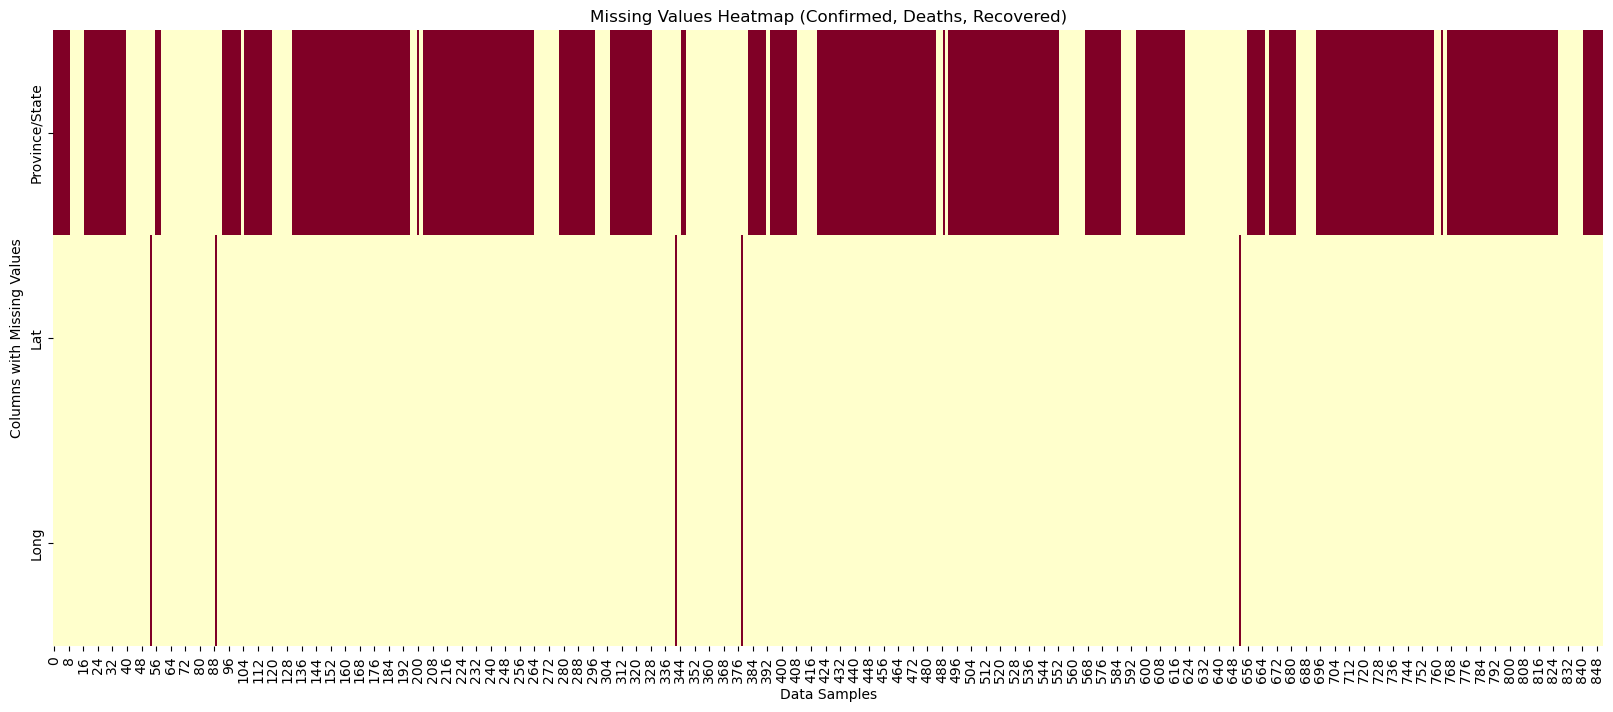

In [46]:
plt.figure(figsize=(20, 8))
sns.heatmap(missing_cols.T, cmap='YlOrRd', cbar=False)
plt.title("Missing Values Heatmap (Confirmed, Deaths, Recovered)")
plt.xlabel("Data Samples")
plt.ylabel("Columns with Missing Values")
plt.show()

In [47]:
combined_df['Province/State'] = combined_df['Province/State'].fillna(combined_df['Country/Region'])

In [48]:
combined_df[combined_df['Lat'].isnull()].head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,03-01-2023,03-02-2023,03-03-2023,03-04-2023,03-05-2023,03-06-2023,03-07-2023,03-08-2023,03-09-2023,Source
53,Repatriated Travellers,Canada,NaN,NaN,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,Confirmed
89,Unknown,China,NaN,NaN,0,0,0,0,0,0,...,1521816,1521816,1521816,1521816,1521816,1521816,1521816,1521816,1521816,Confirmed
342,Repatriated Travellers,Canada,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Deaths
378,Unknown,China,NaN,NaN,0,0,0,0,0,0,...,82195,82195,82195,82195,82195,82195,82195,82195,82195,Deaths
652,Unknown,China,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Recovered


In [49]:
country_means = combined_df.groupby('Country/Region')[['Lat', 'Long']].mean()


In [50]:
for idx, row in combined_df[combined_df['Lat'].isnull()].iterrows():
    country = row['Country/Region']
    if country in country_means.index:
        combined_df.at[idx, 'Lat'] = country_means.loc[country, 'Lat']
        combined_df.at[idx, 'Long'] = country_means.loc[country, 'Long']


In [51]:
combined_df.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
1/22/20           0
                 ..
03-06-2023        0
03-07-2023        0
03-08-2023        0
03-09-2023        0
Source            0
Length: 1148, dtype: int64

In [52]:
combined_df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

In [53]:
# Melt the DataFrame to long format
melted_df  = combined_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long', 'Source'],
    var_name='Date',
    value_name='Cases'
)

In [54]:
melted_df['Date'] = pd.to_datetime(melted_df['Date'])


C:\Users\tejas\AppData\Local\Temp\ipykernel_11036\4247038340.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  melted_df['Date'] = pd.to_datetime(melted_df['Date'])


In [55]:
combined_df.to_csv("combined_clean_data.csv", index=False)

In [56]:
country_data = melted_df[melted_df['Country/Region'] == 'China']


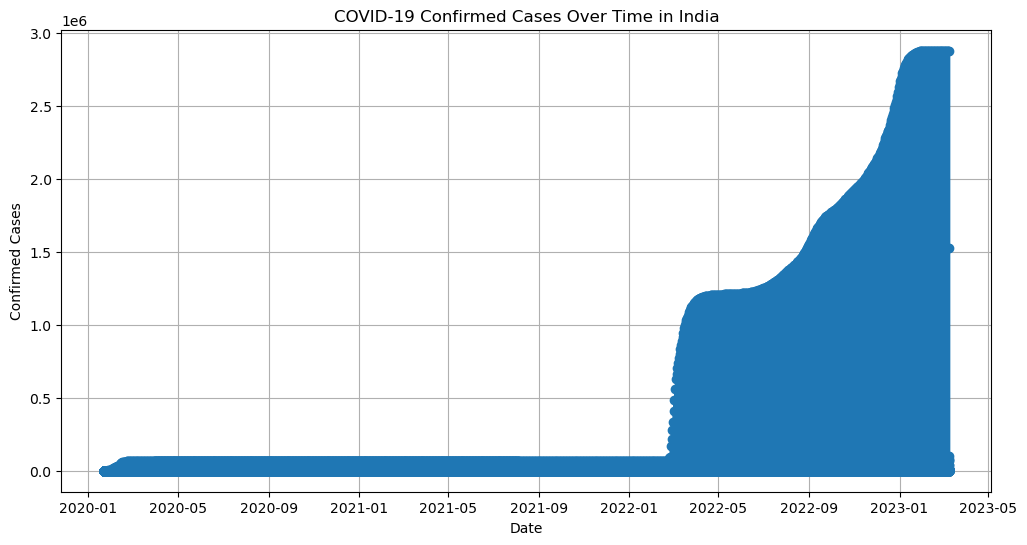

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(country_data['Date'], country_data['Cases'], marker='o')
plt.title('COVID-19 Confirmed Cases Over Time in India')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.grid(True)
plt.show()

# Data Visualization Dashboard (Using Streamlit)




In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Load data with caching for performance
@st.cache_data
def load_data():
    df_confirm = pd.read_csv("time_series_covid19_confirmed_global.csv")
    df_death = pd.read_csv("time_series_covid19_deaths_global.csv")
    df_recover = pd.read_csv("time_series_covid19_recovered_global.csv")
    df_confirm['Source'] = 'Confirmed'
    df_death['Source'] = 'Deaths'
    df_recover['Source'] = 'Recovered'
    combined_df = pd.concat([df_confirm, df_death, df_recover], ignore_index=True)
    combined_df['Province/State'] = combined_df['Province/State'].fillna(combined_df['Country/Region'])
    country_means = combined_df.groupby('Country/Region')[['Lat', 'Long']].mean()
    for idx, row in combined_df[combined_df['Lat'].isnull()].iterrows():
        country = row['Country/Region']
        if country in country_means.index:
            combined_df.at[idx, 'Lat'] = country_means.loc[country, 'Lat']
            combined_df.at[idx, 'Long'] = country_means.loc[country, 'Long']
    melted_df = combined_df.melt(
        id_vars=['Province/State', 'Country/Region', 'Lat', 'Long', 'Source'],
        var_name='Date',
        value_name='Cases'
    )
    melted_df['Date'] = pd.to_datetime(melted_df['Date'])
    return melted_df

st.title('COVID-19 Global Dashboard')

# Load and process data
melted_df = load_data()

# Sidebar for country selection
countries = melted_df['Country/Region'].unique()
selected_country = st.sidebar.selectbox('Select a country', countries)

# Filter and plot data
country_data = melted_df[(melted_df['Country/Region'] == selected_country) & (melted_df['Source'] == 'Confirmed')]

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(country_data['Date'], country_data['Cases'], marker='o')
ax.set_title(f'COVID-19 Confirmed Cases Over Time in {selected_country}')
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
ax.grid(True)
st.pyplot(fig)


2025-05-14 16:05:11.218 No runtime found, using MemoryCacheStorageManager
C:\Users\tejas\AppData\Local\Temp\ipykernel_11036\1306117085.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  melted_df['Date'] = pd.to_datetime(melted_df['Date'])


TypeError: float() argument must be a string or a real number, not 'Figure'